In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
data = pd.read_csv('task1P.csv')

In [3]:
data.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

In [5]:
# Step 2: Handle missing values
missing_entries = data.isnull().sum()
print("Number of missing entries per feature:")
print(missing_entries)

Number of missing entries per feature:
timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64


In [6]:
# Drop 'Position' column as it has 100% missing values
data.drop(columns=['Position'], inplace=True)

In [7]:
# Fill missing values in 'elevation' with median (since 'elevation' is likely to be skewed)
elevation_median = data['elevation'].median()
data['elevation'].fillna(elevation_median, inplace=True)

In [8]:
print(f"Missing values filled. 'elevation' filled with median value: {elevation_median}")

Missing values filled. 'elevation' filled with median value: 2.74


In [9]:
missing_value_explanation="""Summary of Handling Missing Values
'Position' Column: Dropped because it contains only missing values.
'Elevation' Column: Filled missing values using the median to handle potential skewness in the data."""
print(missing_value_explanation)

Summary of Handling Missing Values
'Position' Column: Dropped because it contains only missing values.
'Elevation' Column: Filled missing values using the median to handle potential skewness in the data.


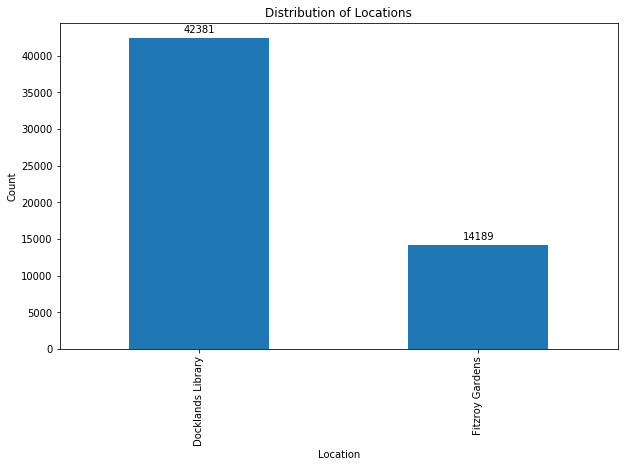

In [10]:
# Step 3: Histogram of 'location'
location_counts = data['location'].value_counts()
ax=data['location'].value_counts().plot(kind='bar',figsize=(10, 6))
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
for i in range(len(location_counts)):
    ax.text(i, location_counts[i] + 500, str(location_counts[i]), ha='center', va='bottom')

plt.show()


In [11]:
print(f"Total number of unique locations: {data['location'].nunique()}")

Total number of unique locations: 2


In [12]:
explanation = """
Explanation of the Distribution:
Docklands Library:
Count: 42,381 entries.
This location has the majority of the sensor readings, 
indicating a higher frequency or duration of data collection compared to the other location.

Fitzroy Gardens:
Count: 14,189 entries.
This location has significantly fewer sensor readings compared to Docklands Library, 
suggesting it was monitored less frequently or for a shorter period.

Total Number of Locations:
There are 2 unique locations in total: Docklands Library and Fitzroy Gardens.

Summary:
The data shows a clear imbalance in the number of sensor readings between the two locations, 
with Docklands Library having roughly three times more entries than Fitzroy Gardens. 
This disparity could influence any analysis or modeling efforts, 
as the majority of the insights might be driven by data from Docklands Library. 
It is essential to consider this imbalance to ensure a fair representation of both 
locations in any subsequent analysis.
"""

print(explanation)


Explanation of the Distribution:
Docklands Library:
Count: 42,381 entries.
This location has the majority of the sensor readings, 
indicating a higher frequency or duration of data collection compared to the other location.

Fitzroy Gardens:
Count: 14,189 entries.
This location has significantly fewer sensor readings compared to Docklands Library, 
suggesting it was monitored less frequently or for a shorter period.

Total Number of Locations:
There are 2 unique locations in total: Docklands Library and Fitzroy Gardens.

Summary:
The data shows a clear imbalance in the number of sensor readings between the two locations, 
with Docklands Library having roughly three times more entries than Fitzroy Gardens. 
This disparity could influence any analysis or modeling efforts, 
as the majority of the insights might be driven by data from Docklands Library. 
It is essential to consider this imbalance to ensure a fair representation of both 
locations in any subsequent analysis.



In [13]:
# Create the OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)

In [14]:
# Fit and transform the 'location' column
encoded_location = encoder.fit_transform(data[['location']])

In [15]:
# Create a DataFrame with the encoded values
encoded_location_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(['location']))

In [16]:
# Display the encoded values
print("Encoded values for 'location':")
print(encoded_location_df.head())

Encoded values for 'location':
   location_Docklands Library  location_Fitzroy Gardens
0                         1.0                       0.0
1                         1.0                       0.0
2                         1.0                       0.0
3                         1.0                       0.0
4                         1.0                       0.0


In [17]:
# Merge the encoded location columns back to the main dataframe
data = pd.concat([data, encoded_location_df], axis=1)

In [18]:
encoding_explanation=""" Justification for One-Hot Encoding Usage:
Non-ordinal Nature: The locations "Docklands Library" and "Fitzroy Gardens" do not have a natural order. 
                    One-Hot Encoding treats each category independently, avoiding any misleading 
                    ordinal relationships.
Interpretability: The resulting binary columns are easy to interpret and understand, 
                  representing the presence or absence of each location in the dataset.
Compatibility with Many Models: Many machine learning models work well with one-hot encoded variables, 
                 making this approach versatile."""

print(encoding_explanation)

 Justification for One-Hot Encoding Usage:
Non-ordinal Nature: The locations "Docklands Library" and "Fitzroy Gardens" do not have a natural order. 
                    One-Hot Encoding treats each category independently, avoiding any misleading 
                    ordinal relationships.
Interpretability: The resulting binary columns are easy to interpret and understand, 
                  representing the presence or absence of each location in the dataset.
Compatibility with Many Models: Many machine learning models work well with one-hot encoded variables, 
                 making this approach versatile.


In [19]:
features_to_scale = ["boardtype", "boardid", "temp_max", "temp_min", "temp_avg",
                     "light_max", "light_min", "light_avg", "humidity_min",
                     "humidity_max", "humidity_avg"]

In [20]:
#Apply Min-Max scaling
scaler = MinMaxScaler()

In [21]:
scaled_features = scaler.fit_transform(data[features_to_scale])
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale)

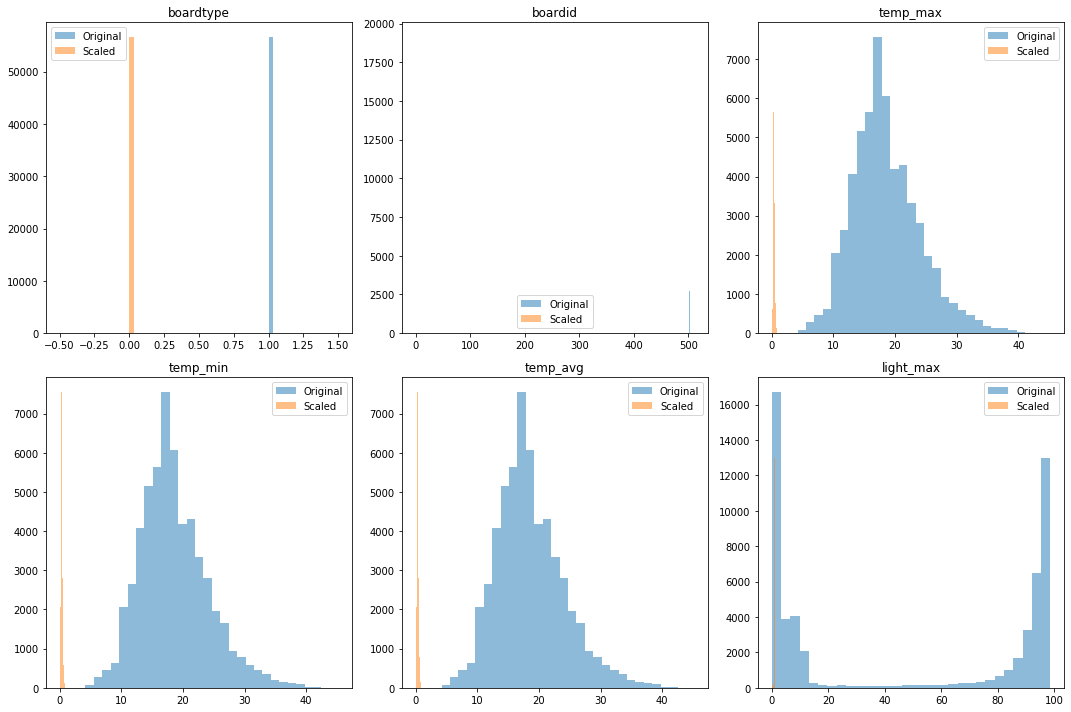

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(features_to_scale[:6]):
    ax = axes[i // 3, i % 3]
    ax.hist(data[feature], bins=30, alpha=0.5, label='Original')
    ax.hist(scaled_features_df[feature], bins=30, alpha=0.5, label='Scaled')
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()
plt.show()

In [23]:
min_max_explanation="""Analysis of Plots:
boardtype:
Original: The values are discrete integers.
Scaled: The values are compressed into a much narrower range [0, 1].
Explanation: Min-Max scaling has adjusted the range of values to fit within [0, 1], 
while maintaining the original distribution shape.

boardid:
Original: The values are discrete integers.
Scaled: The values are also compressed into the range [0, 1].
Explanation: Similar to boardtype, Min-Max scaling has transformed the values to the [0, 1] range.

temp_max:
Original: The distribution appears normal with a range from around 0 to 40.
Scaled: The distribution retains its normal shape but now falls within the [0, 1] range.
Explanation: Min-Max scaling has preserved the shape of the distribution while transforming the range to [0, 1].

temp_min:
Original: The distribution is similar to temp_max but shifted towards lower values.
Scaled: The distribution retains its original shape within the [0, 1] range.
Explanation: The scaling process retains the relative differences between the values.

temp_avg:
Original: The distribution is centered between temp_max and temp_min.
Scaled: The scaled distribution maintains the same shape within [0, 1].
Explanation: The shape and relative positioning are preserved, with the range adjusted to [0, 1].

light_max:
Original: The distribution shows a concentration of values at both low and high ends.
Scaled: The distribution pattern remains similar but scaled to the [0, 1] range.
Explanation: The bimodal nature of the distribution is retained while 
the values are scaled down to the common range.

Explanation:
Min-Max Scaling: This scaling method transforms each feature to a common scale [0, 1] 
by subtracting the minimum value and dividing by the range (max-min). 
This ensures all features contribute equally, preventing any single feature from dominating due to its scale.

Preserved Distribution Shape: The scaling preserves the original distribution shape of each feature. 
The relative differences between the values are maintained, ensuring that the scaled 
data retains the same underlying patterns as the original data.
Impact on Models: Scaling the features helps in models that rely on distance metrics 
(like k-nearest neighbors, SVM, and neural networks), ensuring that 
all features are on a comparable scale and contribute equally to the model.

Summary:
The Min-Max scaling has effectively transformed all the specified features to a common range [0, 1] 
while preserving the original distribution shapes. 
This makes the features comparable and ensures that no single feature disproportionately 
influences the model due to its original scale."""

print(min_max_explanation)

Analysis of Plots:
boardtype:
Original: The values are discrete integers.
Scaled: The values are compressed into a much narrower range [0, 1].
Explanation: Min-Max scaling has adjusted the range of values to fit within [0, 1], 
while maintaining the original distribution shape.

boardid:
Original: The values are discrete integers.
Scaled: The values are also compressed into the range [0, 1].
Explanation: Similar to boardtype, Min-Max scaling has transformed the values to the [0, 1] range.

temp_max:
Original: The distribution appears normal with a range from around 0 to 40.
Scaled: The distribution retains its normal shape but now falls within the [0, 1] range.
Explanation: Min-Max scaling has preserved the shape of the distribution while transforming the range to [0, 1].

temp_min:
Original: The distribution is similar to temp_max but shifted towards lower values.
Scaled: The distribution retains its original shape within the [0, 1] range.
Explanation: The scaling process retains the 